## Imports

In [1]:
import pickle
import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import regexp_tokenize
import spacy
import gensim.corpora as corpora
from gensim import corpora, models, similarities, matutils
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import pyLDAvis.sklearn
import warnings
warnings.filterwarnings("ignore")
from __future__ import division
from sklearn.manifold import TSNE
import numpy as np
import os
import Classes_Functions as pr
%load_ext autoreload
%autoreload

## Import Data

In [2]:
# Load Pickled Dataframe from Cleaning Notebook into a DataFrame
path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Pickled_Files\cleaned_addresses.pkl"

df = pickle.load(open(path,'rb'))
df.head(100)

,president_number,term,pres_name,pres_det,president_x,address,party,Year,time_period
0,1,1,Washington,1 Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800
1,1,2,Washington,2 Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800
2,2,1,JAdams,1 JAdams,02.JAdams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800
3,3,1,Jefferson,1 Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850
4,3,2,Jefferson,2 Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850
5,4,1,Madison,1 Madison,04.Madison.1.txt,UNWILLING to depart from examples of the most...,Democratic-Republican,1809,1800-1850
6,4,2,Madison,2 Madison,04.Madison.2.txt,ABOUT to add the solemnity of an oath to the o...,Democratic-Republican,1813,1800-1850
7,5,1,Monroe,1 Monroe,05.Monroe.1.txt,I SHOULD be destitute of feeling if I was not ...,Democratic-Republican,1817,1800-1850
8,5,2,Monroe,2 Monroe,05.Monroe.2.txt,I SHALL not attempt to describe the grateful...,Democratic-Republican,1821,1800-1850
9,6,1,JQAdams,1 JQAdams,06.JQAdams.1.txt,IN compliance with an usage coeval with the e...,Democratic-Republican,1825,1800-1850


## Locating Addtional Stop Words

In [3]:
# Create text array
text = df['address']

# Remove stopwords
text = pr.remove_stopwords(text)

# Lemmatize
text = pr.lemma(text)

# Define Count Vectorizer
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',ngram_range=(1,2),stop_words = 'english')

# call `fit` to build the vocabulary
vectorizer.fit(text)

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

In [4]:
# Convert sparse array to numpy array
x_back = x.toarray()

In [5]:
# View word Matrix

pd.DataFrame(x_back, columns=vectorizer.get_feature_names()).head()

,abandon,abandon act,abandon claim,abandon delusion,abandon enemy,abandon government,abandon great,abandon habit,abandon hope,abandon indignantly,...,zealous unceasing,zealously,zealously contend,zealously devote,zealously devoted,zealously enforce,zealously steadily,zealously unite,zone,zone extend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Determine what are the most common words

sum_words = x.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_words = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_words

[('people', 633),
 ('nation', 509),
 ('great', 421),
 ('government', 393),
 ('make', 357),
 ('country', 352),
 ('power', 339),
 ('world', 327),
 ('time', 275),
 ('citizen', 273),
 ('law', 269),
 ('peace', 256),
 ('man', 250),
 ('good', 246),
 ('new', 246),
 ('right', 244),
 ('public', 228),
 ('duty', 208),
 ('freedom', 192),
 ('free', 191),
 ('war', 190),
 ('year', 176),
 ('life', 167),
 ('hope', 167),
 ('american', 166),
 ('let', 160),
 ('principle', 155),
 ('know', 153),
 ('work', 152),
 ('spirit', 142),
 ('national', 140),
 ('purpose', 136),
 ('high', 134),
 ('come', 134),
 ('long', 133),
 ('liberty', 131),
 ('day', 129),
 ('party', 123),
 ('fellow', 122),
 ('need', 122),
 ('place', 121),
 ('justice', 121),
 ('support', 117),
 ('force', 114),
 ('policy', 114),
 ('seek', 109),
 ('political', 107),
 ('history', 105),
 ('secure', 105),
 ('foreign', 104),
 ('today', 104),
 ('way', 103),
 ('state', 102),
 ('change', 102),
 ('present', 101),
 ('question', 101),
 ('believe', 101),
 ('servi

In [7]:
# Add additional stop words
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['government','people','nation','states', 'make','long','come','day','know','day','way','fellow'
               ,'americans','citizens','united','america','shall','must','may','upon','every','let','one','would','great']
stopwords.extend(newStopWords)

## Analysis

#### NMF Topic Modelling

In [8]:
# Create text array
text = df['address']

In [9]:
# Create vectorizer and fit to text
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = 'english')
doc_word = vectorizer.fit_transform(text)

In [10]:
# Fit and transform NMF
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(59, 2)

In [11]:
# words in each topic
topic_word = nmf_model.components_
topic_word.shape

(2, 8921)

In [12]:
# Analyze top features to model
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['government', 'people', 'states', 'constitution', 'power', 'country'],
 ['world', 'america', 's', 'new', 'people', 'nation']]

In [13]:
# Add topic to main dataframe
df['topic'] = doc_topic.argmax(axis=1)
df.head()

,president_number,term,pres_name,pres_det,president_x,address,party,Year,time_period,topic
0,1,1,Washington,1 Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800,0
1,1,2,Washington,2 Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800,0
2,2,1,JAdams,1 JAdams,02.JAdams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800,0
3,3,1,Jefferson,1 Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850,0
4,3,2,Jefferson,2 Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850,0


## Lemmatized (NMF) 
#### Initial topics are not as strong as I would like, so I try lemamtizing

In [14]:
# Seperate text from dataframe
text = df['address']

In [15]:
# Remove stopwords
text = pr.remove_stopwords(text)

In [16]:
# Lemmatize
text = pr.lemma(text)

In [17]:
# Create vectorizer and fit to text
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopwords,ngram_range = (1,2),min_df=0.1)
doc_word = vectorizer.fit_transform(text)

In [18]:
# Fit and transform NMF
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(59, 2)

In [19]:
# words in each topic
topic_word = nmf_model.components_
topic_word.shape

(2, 1643)

In [20]:
# Analyze top features to model
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['power', 'country', 'citizen', 'law', 'duty', 'right'],
 ['world', 'new', 'peace', 'freedom', 'time', 'man']]

In [21]:
# Add topic to main dataframe
df['topic'] = doc_topic.argmax(axis=1)
df.head(100)

,president_number,term,pres_name,pres_det,president_x,address,party,Year,time_period,topic
0,1,1,Washington,1 Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800,0
1,1,2,Washington,2 Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800,0
2,2,1,JAdams,1 JAdams,02.JAdams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800,0
3,3,1,Jefferson,1 Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850,0
4,3,2,Jefferson,2 Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850,0
5,4,1,Madison,1 Madison,04.Madison.1.txt,UNWILLING to depart from examples of the most...,Democratic-Republican,1809,1800-1850,0
6,4,2,Madison,2 Madison,04.Madison.2.txt,ABOUT to add the solemnity of an oath to the o...,Democratic-Republican,1813,1800-1850,0
7,5,1,Monroe,1 Monroe,05.Monroe.1.txt,I SHOULD be destitute of feeling if I was not ...,Democratic-Republican,1817,1800-1850,0
8,5,2,Monroe,2 Monroe,05.Monroe.2.txt,I SHALL not attempt to describe the grateful...,Democratic-Republican,1821,1800-1850,0
9,6,1,JQAdams,1 JQAdams,06.JQAdams.1.txt,IN compliance with an usage coeval with the e...,Democratic-Republican,1825,1800-1850,0


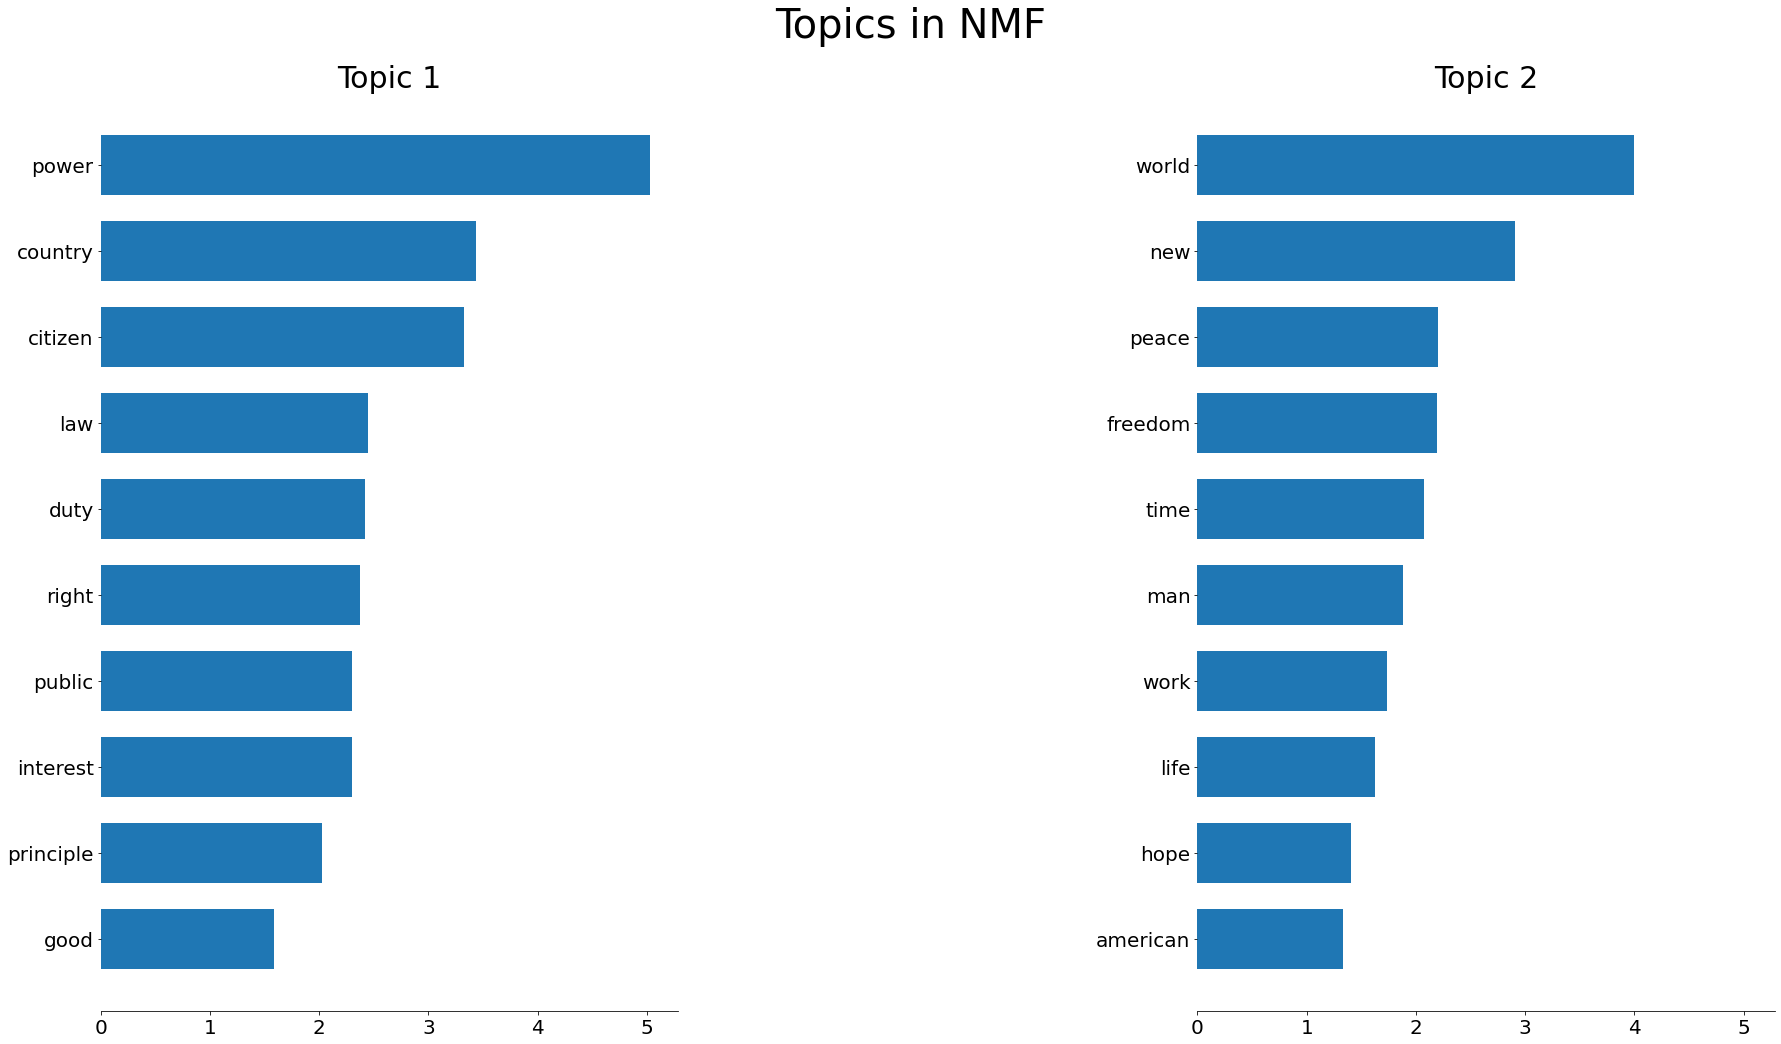

<Figure size 432x288 with 0 Axes>

In [22]:
n_top_words = 10
pr.plot_top_words(nmf_model,words,n_top_words, 'Topics in NMF',1,2)

In [23]:
# View tsnse topic plot
path = path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Data\Visualization"

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(nmf_model, doc_word, vectorizer, mds='tsne')
pyLDAvis.save_html(panel, path + '\\nmf_2topics.html')

## Lemmatized (LDA)
#### It seems the lemmatized nmf is helpful for <4 topics, but not for a larger number of topics...let's try LDA to compare results

In [24]:
# Seperate text from dataframe
text = df['address']

In [25]:
# Remove stopwords
text = pr.remove_stopwords(text)

In [26]:
# Lemmatize
text = pr.lemma(text)

In [27]:
# Create count vectorizer
count_vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopwords,ngram_range = (1,2),min_df=0.1)
count_vectorizer.fit(text)

CountVectorizer(min_df=0.1, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='\\b[^\\d\\W]+\\b')

In [28]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(text).transpose()
doc_word

<1643x59 sparse matrix of type '<class 'numpy.int64'>'
	with 24137 stored elements in Compressed Sparse Column format>

In [29]:
# View Dataframe
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
abandon,0,0,1,1,0,0,0,0,2,0,...,0,0,0,0,0,2,1,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
able,0,0,0,0,1,0,0,2,1,0,...,0,0,1,0,0,0,0,0,0,0
abroad,0,0,1,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0


In [30]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

In [31]:
# Map matrix into tokens
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [32]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.ldamodel.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)

In [33]:
lda.print_topics()

[(0,
  '0.010*"law" + 0.007*"public" + 0.006*"country" + 0.005*"world" + 0.005*"man" + 0.005*"duty" + 0.005*"business" + 0.005*"good" + 0.005*"power" + 0.005*"right"'),
 (1,
  '0.010*"power" + 0.010*"country" + 0.008*"citizen" + 0.007*"public" + 0.007*"right" + 0.007*"law" + 0.006*"duty" + 0.006*"good" + 0.006*"interest" + 0.005*"principle"'),
 (2,
  '0.015*"world" + 0.011*"new" + 0.009*"time" + 0.009*"freedom" + 0.009*"man" + 0.008*"peace" + 0.007*"life" + 0.007*"work" + 0.006*"today" + 0.006*"free"')]

In [34]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]

In [35]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [36]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[0:5]

[[(1, 0.9980489)],
 [(0, 0.010364938), (1, 0.97924775), (2, 0.010387313)],
 [(1, 0.9988337)],
 [(1, 0.81301475), (2, 0.18629089)],
 [(1, 0.9974612)]]

### After testing multiple components, there is no appreciable difference between using NMF vs. LDA for dimensionality reduction